In [4]:
import numpy as np
from datascience import *
%matplotlib inline

---

- ## 주사위 굴림에서 적어도 6이 한번 나올 확률
    - ### 한 번 굴렸을 때 적어도 6이 나오지 않을 확률: $1 - \frac{1}{6} = \frac{5}{6}$
    - ### 두 번 굴렸을 때 모두 적어도 6이 나올 확률: $1 - (\frac{5}{6})^2$

- ### 1번에서 50번 굴려서 적어도 6이 한 번 나올 확률을 Table로 작성

In [3]:
dices = Table().with_columns(
    "Rolls", np.arange(1, 51, 1),
    "Chance of at least one 6", 1 - ((5 / 6) ** np.arange(1, 51, 1))
)
dices

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


- ### 시각화
    - #### 굴림 횟수가 증가할수록 적어도 한 번 6이 나올 확률은 급격히 증가함

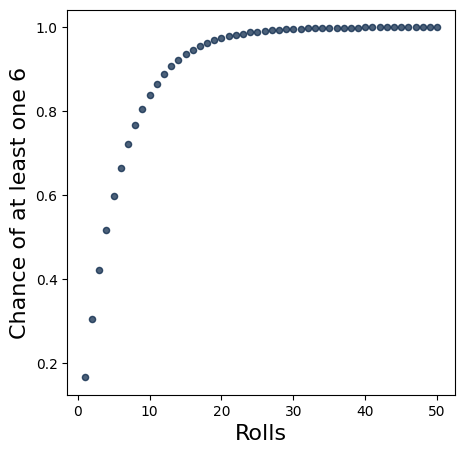

In [6]:
dices.scatter("Rolls")

- ### 50번 굴려서 적어도 한 번 6이 나올 확률

In [10]:
dices.take(49)

Rolls,Chance of at least one 6
50,0.99989


---

- ## Sampling

<br>

In [16]:
table = Table.read_table("./csv/top_movies_2017.csv")
table = table.with_column("Row Index", np.arange(0, table.num_rows))
table = table.move_to_start("Row Index")
table.show(3)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965


<br>

- ### 1. Deterministic Sample
    - #### 선택하려는 집합의 요소를 지정

- #### 3, 18, 100 행 추출

In [17]:
table.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
18,The Lion King,Buena Vista,422783777,792511700,1994
100,The Hunger Games,Lionsgate,408010692,452174400,2012


- #### Title이 Harry Potter인 행 추출

In [18]:
table.where("Title", are.containing("Harry Potter"))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,317575550,497066400,2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,381011219,426630300,2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,290013036,401608200,2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,261988482,399302200,2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,292004738,377314200,2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,301959197,359788300,2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,249541069,357233500,2004


<br>

- ### 2. Systematic Sample
    - #### 앞에서 임의의 위치 선택 후 균등한 간격의 Row 선택

- #### 처음 10개의 행 중 하나를 랜덤 선택하고, 매 10번째 행을 선택

In [19]:
rand = np.random.choice(np.arange(0, 10, 1))
table.take(np.arange(rand, table.num_rows, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
5,The Ten Commandments,Paramount,65500000,1164590000,1956
15,Return of the Jedi,Fox,309306177,836188200,1983
25,Forrest Gump,Paramount,330252182,698884100,1994
35,Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969
45,American Graffiti,Universal,115000000,584200000,1973
55,The Towering Inferno,Fox,116000000,545629600,1974
65,The Lord of the Rings: The Two Towers,Newline,342551365,513177800,2002
75,Lady and the Tramp,Disney,93602326,495483100,1955
85,The Bridge on the River Kwai,Columbia,27200000,483616000,1957
95,Aladdin,Buena Vista,217350219,466212500,1992


<br>

- ### 3. Random Sampling    

- ### 주사위 굴리기의 이론적 확률
    - ### 모든 면이 나올 확률이 $\frac{1}{6}$ 로 같음

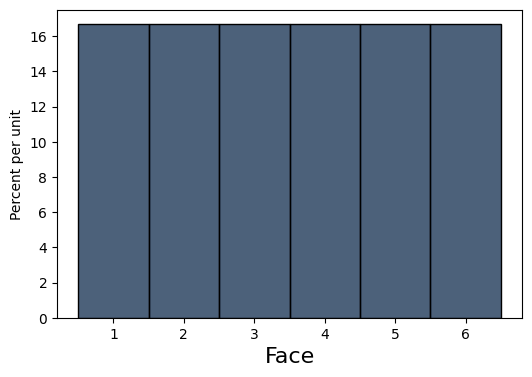

In [22]:
Table().with_columns(
    "Face", np.arange(1, 7, 1)
).hist(bins=np.arange(0.5, 6.6, 1))

<br>

- ### 주사위 굴림을 시뮬레이션하여 데이터 얻기
    - ### table.sample(k=None, with_replacement=True, weights=None)
        - #### k: sampling할 행의 수
        - #### with_replacement: 중복 가능 여부
        - #### weights: 가중치, 합쳐서 1이 되는 배열

- #### 주사위를 10번 던졌을 때의 히스토그램

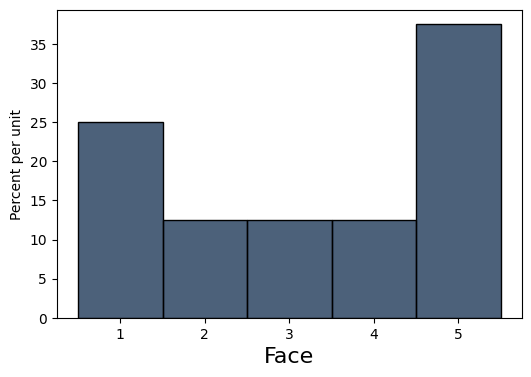

In [31]:
die = Table().with_columns("Face", np.arange(1, 7, 1))
die.sample(10).hist("Face", bins=np.arange(0.5, 6.5, 1))

- #### 주사위를 1000번 던졌을 때의 히스토그램
    - #### 평균의 법칙
        - <h4 style="color: red;">실험이 동일한 조건에서 독립적으로 반복되면 이론적 확률에 가까워짐</h4>

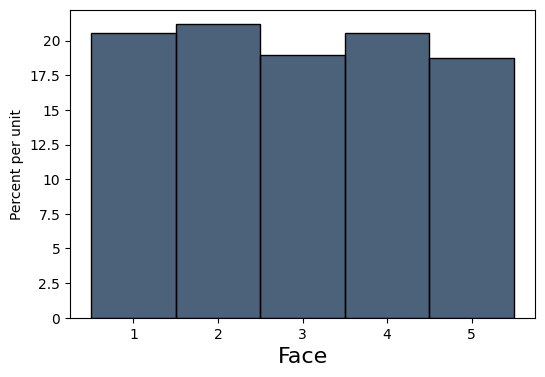

In [32]:
die.sample(1000).hist("Face", bins=np.arange(0.5, 6.5, 1))

<br>

---

- ## 대규모 모집단으로부터 무작위 표본 추출

In [38]:
united = Table.read_table("./csv/united_summer2015.csv")
united.show(4)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0


<br>

- #### 모집단의 항공편 지연율 히스토그램

In [40]:
united.column("Delay").min(), united.column("Delay").max()

(-16, 580)

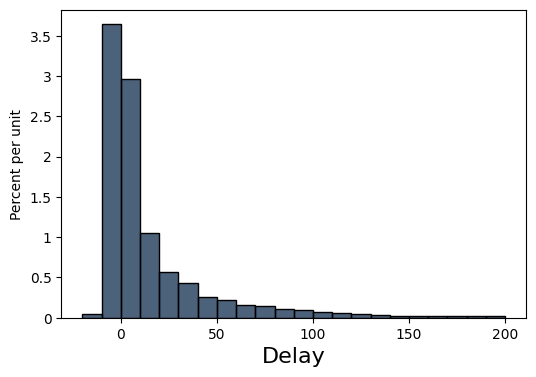

In [43]:
united.hist("Delay", bins=np.arange(-20, 201, 10))

- #### 표본 10개의 지연율 히스토그램

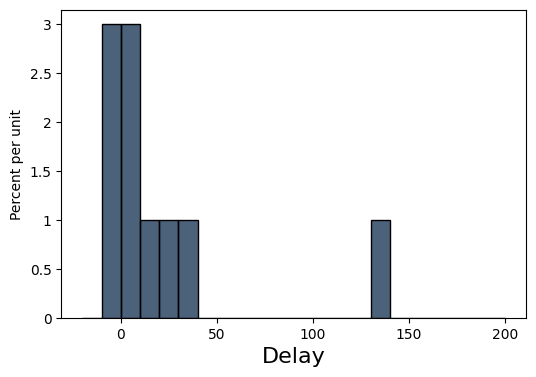

In [49]:
united.sample(10).hist("Delay", bins=np.arange(-20, 201, 10))

- #### 표본 1000개의 지연율 히스토그램
    - #### 대규모 Random Sampling: 모집단의 히스토그램과 유사

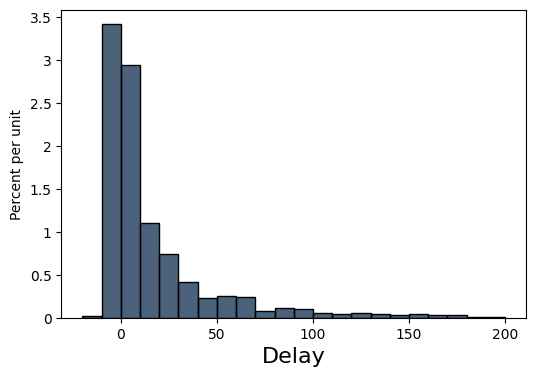

In [50]:
united.sample(1000).hist("Delay", bins=np.arange(-20, 201, 10))

<br>

- #### 모집단에서의 Delay 중간값

In [53]:
np.median(united.column("Delay"))

2.0

- #### 1000개의 표본에서의 Delay중간값

In [58]:
def random_sample_median():
    return np.median(united.sample(1000).column("Delay"))

random_sample_median()

2.0

- #### 5000번 시뮬레이션 한 결과의 히스토그램
    - <h4 style="color: red;">표본의 중앙값도 모집단의 중앙값인 2일 가능성이 매우 높음</h4>

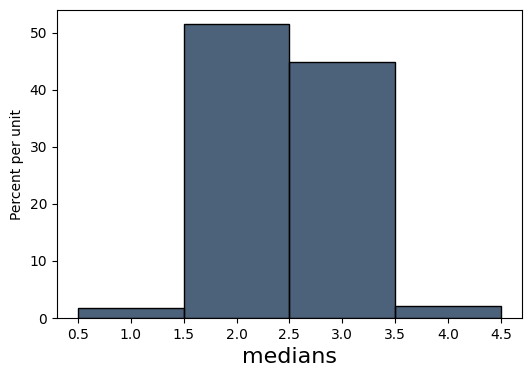

In [63]:
medians = make_array()
for _ in range(5000):
    medians = np.append(medians, random_sample_median())

Table().with_column("medians", medians).hist("medians", bins=np.arange(0.5, 5, 1))

---